In [1]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'mod5_functions.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math

### The time format is in UTC for GT  
Something to think about as you review the trends, and might want to aggregate the different timezones in the US to a central zone... maybe CT.

The score given by the data is actually a relative score that, in order to be used as a metric of popularity, needs to be scaled.

In [2]:
# Some scraped tweets
tweets = pd.read_csv('tweets2.csv')
more_tweets = pd.read_csv('old_tweets.csv')

In [3]:
# Removing irrelevant columns
history = tweets.copy()
history = history[['date', 'tweet']]
more_history = more_tweets.copy()
more_history = more_history[['date','tweet']]

In [4]:
print(history.shape)
print(more_history.shape)


(4820, 2)
(8194, 2)


In [5]:
type(more_history['date'])

pandas.core.series.Series

In [8]:
# Changing the date column to a datetime object
more_history['date'] = pd.to_datetime(more_history['date'])
history['date'] = pd.to_datetime(history['date'])

In [7]:
more_history['date'][0]

Timestamp('2020-05-13 00:00:00')

In [9]:
# Making a column called 'instances' that has the count of tweets for the day
history['instances']=history.groupby('date').transform('count')
more_history['instances']=more_history.groupby('date').transform('count')

In [10]:
more_history.set_index('date', inplace=True)
history.set_index('date', inplace=True)

In [17]:
more_history['2010-09-30':]

,tweet,instances
date,,
2010-09-29,Urban Farms Encourage Education in the Communi...,1
2010-09-28,A few minutes of light show & after party htt...,2
2010-09-28,HB6458 [Update] Agriculture; other; urban agri...,2
2010-09-27,In St Louis this morning headed to do a radio ...,1
2010-09-22,Jones Valley Urban Farm Benefit http://bit.ly...,2
2010-09-22,Jones Valley Urban Farm Benefit http://bit.ly...,2
2010-09-18,"Stitt, Robinson team up for Jones Valley Urban...",1
2010-09-17,"Urban Farm Tour Saturday, Sept. 18 http://bit...",1
2010-09-16,"Urban Farm Tour Saturday, Sept. 18 http://bit...",5


In [18]:
# Getting the monthly numbers
mon_hist = more_history.resample('M').mean()

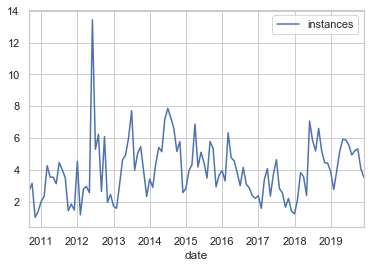

In [19]:
mon_hist[:'2019'].plot()

In [ ]:
# When turned into a yearly interval, non-stationarity occurs
# At Q, M, or 
dftest2(mon_hist[:'2019'])

In [ ]:
r_mean = mon_hist[:'2019'].rolling(window=12, center=False).mean()
fig = plt.figure(figsize=(12,7))
plt.plot(mon_hist[:'2019'], color='blue',label='original')
plt.plot(r_mean, color='black', label='rolling mean')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def dftest2(data):
    test = adfuller(data['instances'])
    test_output = pd.Series(test[0:4], index=['Test Stat', 'P-Value', '# Lags', '# Observations'])
    for key, value in test[4].items():
        test_output['Critical Value (%s)' %key]=value
    return(test_output)

The data is stationary, not sure what this means for the future of this dataset.  
Going to look into the Google Trends data again now that I have my VPN set up to prevent Google from blocking me.

In [ ]:
gt_1520 = pytrends.get_historical_interest(['urban farm'], year_start=2015, geo='US',
                                           year_end=2019, month_end=12)

In [ ]:
gt_1520 = pytrends.get_historical_interest(['urban farm'], year_start=2015, geo='US',
                                           year_end=2019, month_end=12)

In [ ]:
# Captured almost all of the data I wanted
gt_1520

In [ ]:
# Saving this data, looks good
gt_1520.to_csv('gt_1520.csv')

In [ ]:
## This failed to run but I can probably change my location on VPN to get it to run
# gt_0914 = pytrends.get_historical_interest(['urban farm'], year_start=2009, geo='US',
#                                            year_end=2014, month_end=12)

In [ ]:
gt_0914 = pytrends.get_historical_interest(['urban farm'], year_start=2009, geo='US',
                                           year_end=2014, month_end=12)

In [ ]:
gt_1520['2015':'2018'].resample('M').sum().plot()

In [43]:
def dftest3(data):
    test = adfuller(data)
    test_output = pd.Series(test[0:4], index=['Test Stat', 'P-Value', '# Lags', '# Observations'])
    for key, value in test[4].items():
        test_output['Critical Value (%s)' %key]=value
    return(test_output)

In [ ]:
dftest3(gt_1520['2015':'2018'].resample('M').sum())

In [ ]:
ind_farm = pd.read_csv('ind_farm.csv')

In [ ]:
ind_farm = ind_farm[['date', 'tweet']]
ind_farm['date'] = pd.to_datetime(ind_farm['date'])
ind_farm.set_index('date', inplace=True)

In [ ]:
ind_farm

In [ ]:
ind_farm['instances']=ind_farm.groupby('date').transform('count')

In [ ]:
ind_farm

In [ ]:
ind_farm.drop(columns=['tweet'], axis=1, inplace=True)

In [ ]:
ind_farm = ind_farm.loc[~ind_farm.index.duplicated(keep='first')]

In [ ]:
ind_farm['2018':'2011'].resample('M').sum().plot()

In [ ]:
ind_farm['2017']

In [ ]:
dftest2(ind_farm.resample('W').sum())

In [ ]:
vert_farms = pd.read_csv('vert_farm.csv')

In [ ]:
urfa = pd.read_csv('urfa.csv')

In [ ]:
urfa = process_tweets(urfa)

In [ ]:
urfa['2015':'2010'].resample('M').sum().plot()

In [ ]:
dftest2(urfa['2015':'2010'].resample('W').sum())

In [ ]:
auto_corrs(urfa.resample('M').sum(), 'Urban Farming')

In [13]:
# Retrying this, just changed IP address
gt_0914 = pytrends.build_payload(['vertical farm'], geo='US', timeframe='2000-01-01 2019-01-01')
v_farm_gt = pytrends.interest_over_time()

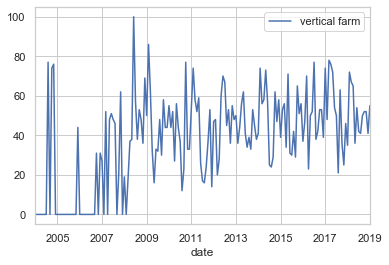

In [16]:
v_farm_gt.drop(columns=['isPartial'], axis=1, inplace=True)
v_farm_gt.plot()

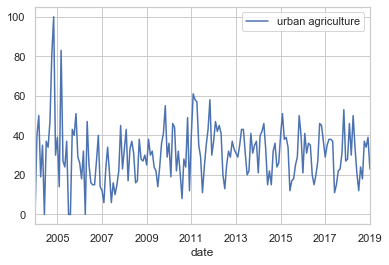

In [17]:
pytrends.build_payload(['urban agriculture'], geo='US', timeframe='2000-01-01 2019-01-01')
urbag_gt = pytrends.interest_over_time()
urbag_gt.drop(columns=['isPartial'], axis=1, inplace=True)
urbag_gt.plot()

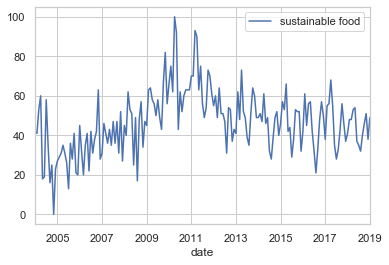

In [18]:
pytrends.build_payload(['sustainable food'], geo='US', timeframe='2000-01-01 2019-01-01')
susfood_gt = pytrends.interest_over_time()
susfood_gt.drop(columns=['isPartial'], axis=1, inplace=True)
susfood_gt.plot()

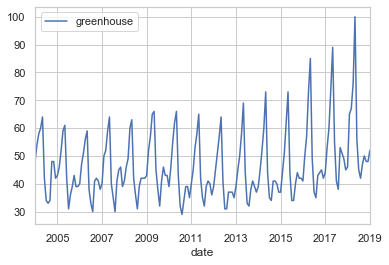

In [22]:
get_int('greenhouse')

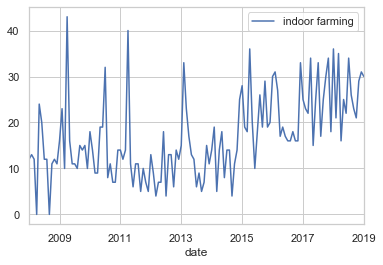

In [40]:
indfa_int = get_int('indoor farming')
indfa_int['2008':].plot()

In [47]:
indfa_int

,indoor farming
date,
2004-01-01,61
2004-02-01,0
2004-03-01,0
2004-04-01,0
2004-05-01,0
...,...
2018-09-01,23
2018-10-01,21
2018-11-01,29


In [44]:
dftest3(indfa_int['2008':])

Test Stat                -0.467187
P-Value                   0.898262
# Lags                   13.000000
# Observations          119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64

In [23]:
indoor = pd.read_csv('ind_farming_gt.csv')

In [35]:
indoor

,Category: All categories
Month,indoor farming: (United States)
2010-01,46
2010-02,49
2010-03,33
2010-04,23
...,...
2020-01,86
2020-02,81
2020-03,58
2020-04,95


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA for indoor farming
                             ARIMA Model Results                              
Dep. Variable:       D.indoor farming   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.295
Method:                       css-mle   S.D. of innovations              0.509
Date:                Thu, 14 May 2020   AIC                            132.589
Time:                        14:09:45   BIC                            142.265
Sample:                    02-01-2009   HQIC                           136.476
                         - 12-01-2015                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0030      0.010      0.310      0.757      -0.016       0.022
ar.L1.D.indoor farming     0.1282      0.139      0.924      0.355    

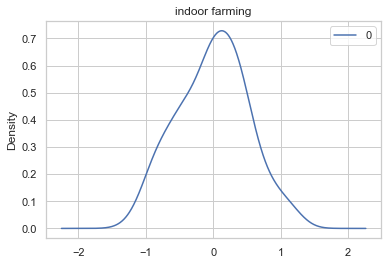

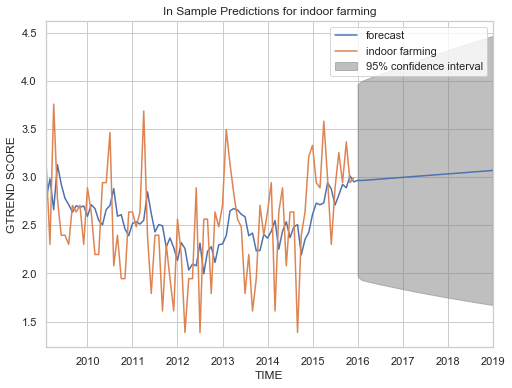

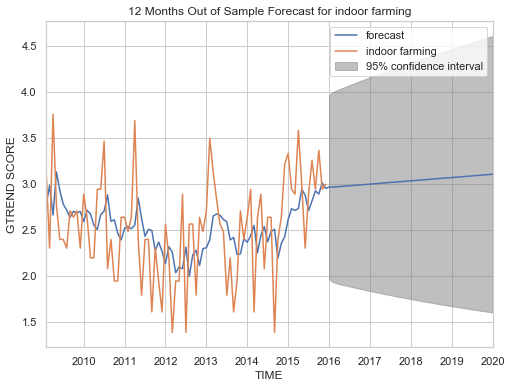

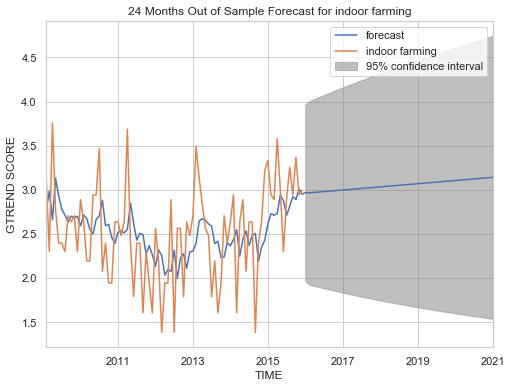

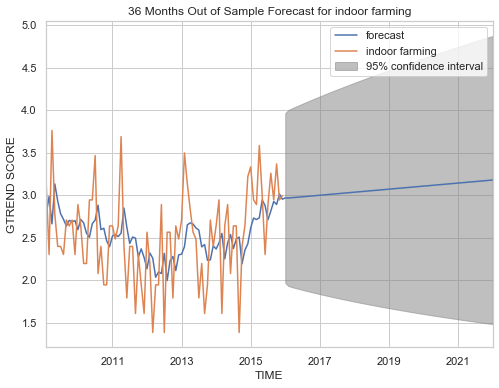

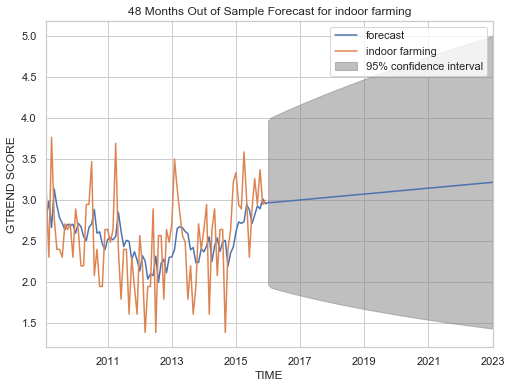

In [121]:
arima_logm(log_indoor['2009':], (1,1,1), 'indoor farming')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA for indoor farming
                             ARIMA Model Results                              
Dep. Variable:       D.indoor farming   No. Observations:                   83
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -286.171
Method:                       css-mle   S.D. of innovations              7.395
Date:                Thu, 14 May 2020   AIC                            586.343
Time:                        15:53:11   BIC                            603.275
Sample:                    02-01-2009   HQIC                           593.145
                         - 12-01-2015                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0462      0.132      0.351      0.725      -0.212       0.304
ar.L1.D.indoor farming    -1.2627      0.092    -13.765      0.000    

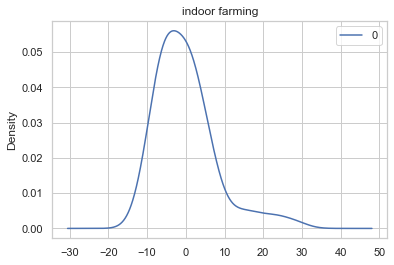

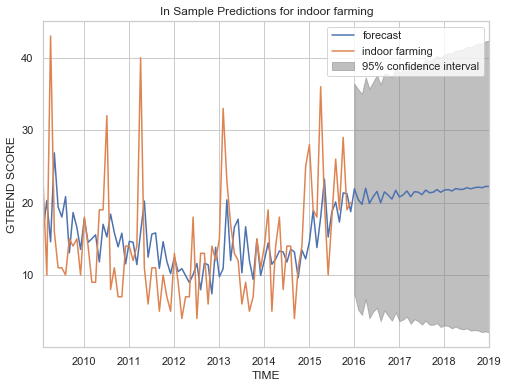

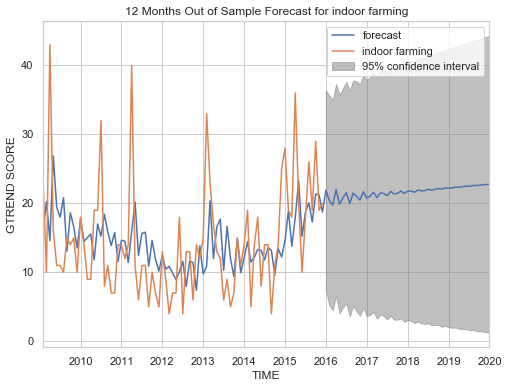

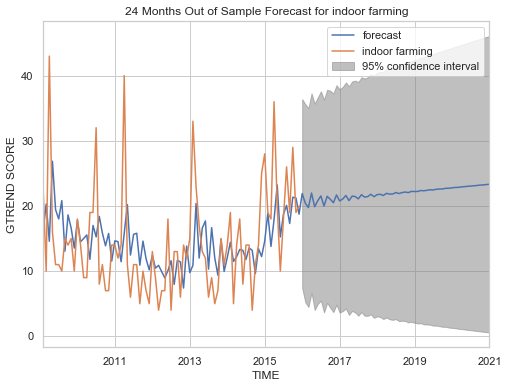

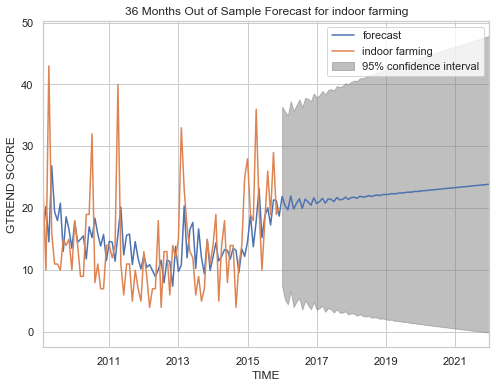

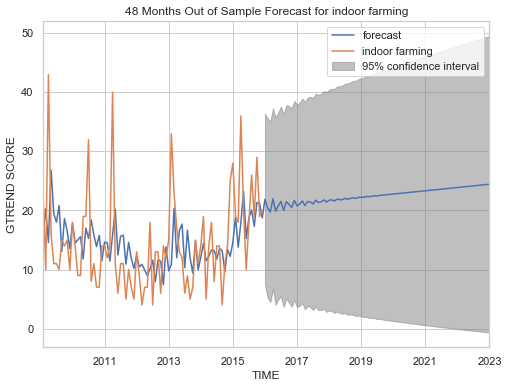

In [174]:
arima_logm(indfa_int['2009':], (2,1,3), 'indoor farming')

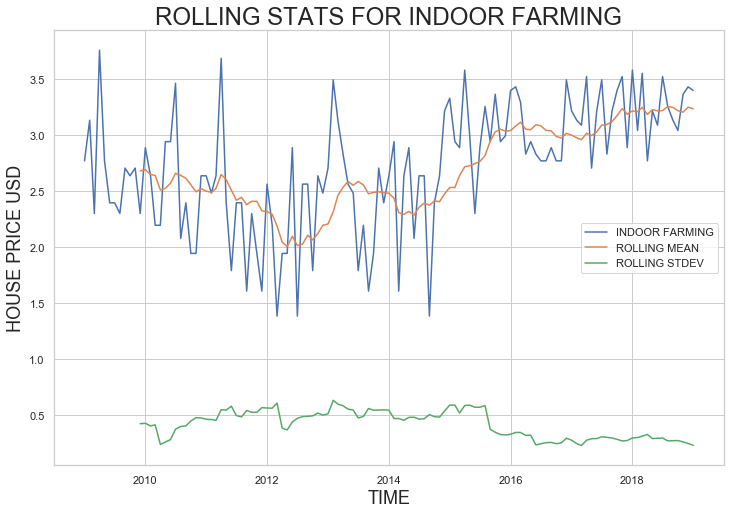

In [130]:
rolling_stats(log_indoor['2009':], 12, 'INDOOR FARMING')

In [65]:
indfa_int['2016':].shape

(37, 1)

In [154]:
arima_search(indfa_int['2008':], [0], [1,2], [1,2])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anacond

(('Best ARIMA Parameters for AIC: ', (0, 1, 1)),
 ('Best ARIMA Parameters for RMSE: ', (0, 2, 1)))

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

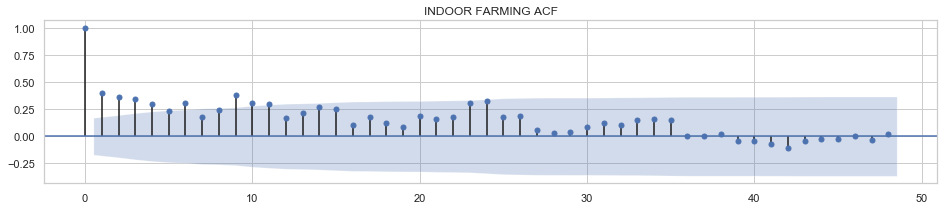

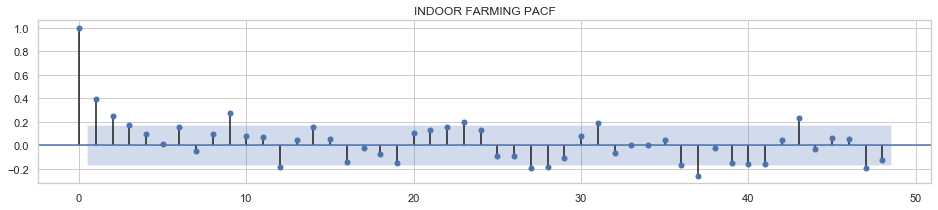

In [67]:
auto_corrs(indfa_int['2008':], 'INDOOR FARMING')

In [88]:
log_indoor = np.log(indfa_int['2009':])

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

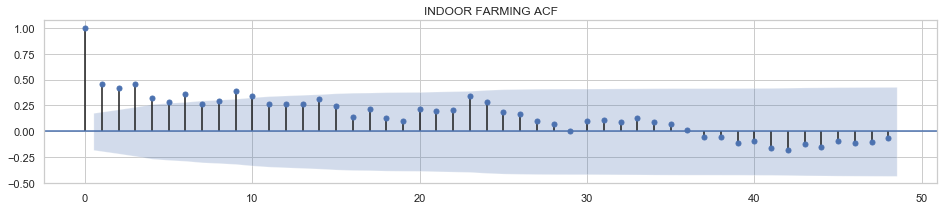

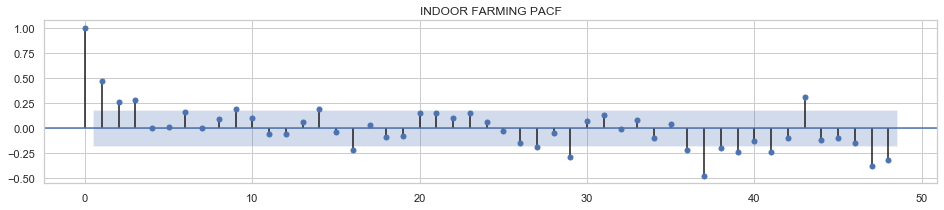

In [89]:
auto_corrs(log_indoor, 'INDOOR FARMING')

In [152]:
arima_search(log_indoor, [0], [1,2], [2,3,4,5])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaco

(('Best ARIMA Parameters for AIC: ', (0, 1, 4)),
 ('Best ARIMA Parameters for RMSE: ', (0, 1, 3)))

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(log_indoor['2009':], model='multiplicative')
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid


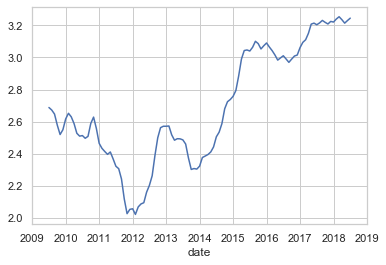

In [149]:
trend.plot()

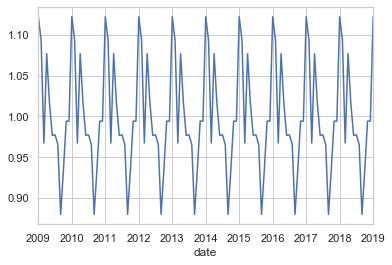

In [150]:
seasonal.plot()

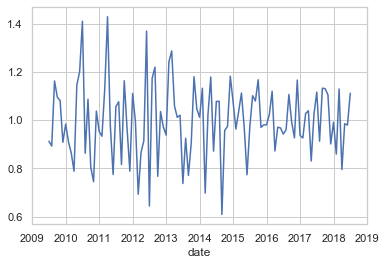

In [151]:
residual.plot()

In [162]:
indfa_int = indfa_int['2009':]

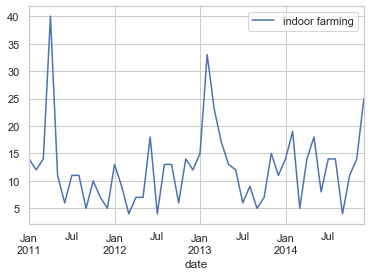

In [165]:
indfa_int['2011':'2014'].plot()

Some work has been done on looking at the trends, seeing some models, and how to manipulate the parameters. I noticed that there was a decent amount of seasonality, as seen in the seasonal decomposition seasonal graph, so I think it will be a good idea to introduce a SARIMA model into the mix. Also look into auto_arima to get the best params.

In [175]:
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=True]; AIC=254.311, BIC=257.179, Time=0.218 seconds
Fit ARIMA(1,1,0)x(1,1,0,52) [intercept=True]; AIC=253.392, BIC=259.128, Time=10.530 seconds
Near non-invertible roots for order (1, 1, 0)(1, 1, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,1)x(0,1,1,52) [intercept=True]; AIC=245.458, BIC=251.194, Time=9.101 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=False]; AIC=252.336, BIC=253.770, Time=0.319 seconds
Fit ARIMA(0,1,0)x(1,1,0,52) [intercept=True]; AIC=256.304, BIC=260.606, Time=11.847 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,0)x(0,1,

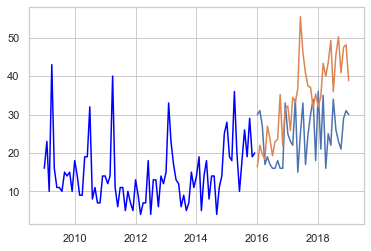

In [183]:
model = auto_arima(indfa_int[:'2015'], start_p=0,d=1,start_q=0,start_P=0,D=1,start_Q=0,
                   trace=True, m=52, error_action='ignore', suppress_warnings=True)
model.fit(indfa_int[:'2015'])
forecast = model.predict(n_periods=len(indfa_int['2016':]))
forecast = pd.DataFrame(forecast,index = indfa_int['2016':].index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(indfa_int[:'2015'], label='Train', color='blue')
plt.plot(indfa_int['2016':], label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

Really happy to see the `auto_arima` working so well, and that I am able to incorporate the seasonal component into the modeling. Will definitely be looking further into this over the weekend.  
  
Would really like now to shift gears and look into sentiment analysis with `VADER` on the tweets that I have scraped. This can be used as an exogenous variable for my time series.